In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


from IPython import display
from ipywidgets import interact, widgets

# Etude de la difference entre pays Développés et émergants

In [114]:
data = pd.read_excel(r'D:\Neoma\Finnce and big data\data vizualisation\DATA.xlsx')

data[data.year==2015].groupby('region').population.sum()




region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

# Les pays emergants crois plus rapidement en population 

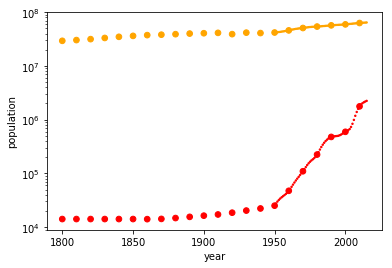

In [123]:
data_beini_france = data.query('(country == "Qatar") or (country=="France")')

size= np.where(data_beini_france.year % 10==0,32,2)
#size = 1000 * rng.rand(100)
    
color = np.where(data_beini_france.country=='Qatar','red','orange')
data_beini_france.plot.scatter("year","population", logy=True, s=size,  c=color)


# Graphique : Nombre de naissance en fonction du PIB

In [232]:
def graphique_Nb_enfant(annee):
    
    data2 =data[data.year == annee]
    area =  5e-6 *data2.population
    colors = data2.region.map({'Africa':'skyblue', 'Europe':'yellow','America':'palegreen','Asia':'red'})
    
    data2.plot.scatter('gdp_per_capita','Nb_naissance_par_femme', s = area, c=colors,  linewidth = 1, edgecolors = "k",figsize = (12,9))               


    plt.axis(ymin=0, ymax=8, xmin=0, xmax =6000)
    plt.xlabel('Nb naissance par femme')
    plt.ylabel('% des enfants qui atteingnet 5ans')
    plt.text(30, 0.65, r'Amerique couleur vert', ha='left')
    plt.text(30, 0.90, r'Asie couleur rouge',ha='left')
    plt.text(30, 0.40, r'Europe couleur jaune', ha='left')
    plt.text(30, 0.15, r'Africa couleur bleu',ha='left')
    

In [233]:
interact(graphique_Nb_enfant, annee = widgets.IntSlider(min = 1950, max=2015, step = 1, value = 1965))

interactive(children=(IntSlider(value=1965, description='annee', max=2015, min=1950), Output()), _dom_classes=…

<function __main__.graphique_Nb_enfant(annee)>

# Graphique : Nombre de naissance en fonction du pourcentage des enfants qui meurent avant l’âge de 5 ans

In [238]:
def difinir_graphique(annee):    
    data2 =data[data.year == annee]
    area =  5e-6 *data2.population
    colors = data2.region.map({'Africa':'skyblue', 'Europe':'yellow','America':'palegreen','Asia':'red'})
    
    data2.plot.scatter('Nb_naissance_par_femme','depasse_5ans', s = area, c=colors,  linewidth = 1, edgecolors = "k",
                       figsize = (12,9))          

    plt.axis(ymin=50, ymax=105, xmin=0, xmax =8)
    plt.xlabel('Nb naissance par femme')
    plt.ylabel('% des enfants qui atteingnet 5ans')
    plt.text(0.1, 57, r'Amerique couleur vert', ha='left')
    plt.text(0.1, 55, r'Asie couleur rouge',ha='left')
    plt.text(0.1, 53, r'Europe couleur jaune', ha='left')
    plt.text(0.1, 51, r'Afrique couleur bleu',ha='left')
    plt.savefig(r'D:\Neoma\Finnce and big data\data vizualisation\books_read.png')
    

In [239]:
interact(difinir_graphique, annee = widgets.IntSlider(min = 1950, max=2015, step = 1, value = 1965))



interactive(children=(IntSlider(value=1965, description='annee', max=2015, min=1950), Output()), _dom_classes=…

<function __main__.difinir_graphique(annee)>

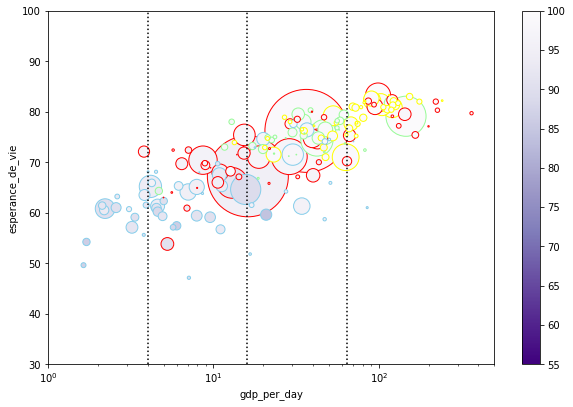

In [235]:
def plotyear(year):
    data2 = data[data.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data2.population
    edgecolor = data2.region.map({'Africa': 'skyblue', 'Europe':'yellow', 'America':'palegreen', 'Asia':'red'})    
    color = data2.depasse_5ans    
    data2.plot.scatter('gdp_per_day', 'esperance_de_vie', logx=True, s=area, c= color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax= 100,
                     linewidths=1, edgecolors = edgecolor, sharex=False, figsize=(10,6.5))
    
    
    for level in [4,16, 64]:
        plt.axvline(level,linestyle=':', color='k')
        
    plt.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
    
plotyear(2015)

,country,year,region,population,esperance_de_vie,depasse_5ans,Nb_naissance_par_femme,gdp_per_capita,gdp_per_day
